In [25]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import  stopwords
from nltk.stem import PorterStemmer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
df = pd.read_csv('/content/drive/MyDrive/NLP/review.csv')

In [9]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [4]:
lowr_df = df['Review'].str.lower()

In [5]:
concat = lowr_df.str.cat(sep = ' ')


In [15]:
import re
data_list = re.sub("[^A-Za-z0-9]"," ",concat)
stop_word = stopwords.words('english')
word_token = word_tokenize(data_list)

In [31]:
stopword_list = []
without_stopword_list = []
for i in word_token:
  if i in  stop_word:
    stopword_list.append(i)
  else:
    without_stopword_list.append(i)
without_single_char = []
for i in without_stopword_list:
  if len(i) >  2:
    without_single_char.append(i)
unwanted_word = ['movie', 'one', 'would', 'make']
result_words = []
for i in without_single_char:
  if i not in unwanted_word:
    result_words.append(i)
# calculate Frequenc Distibution
word_dist = nltk.FreqDist(result_words)

<Axes: xlabel='word', ylabel='Frequency'>

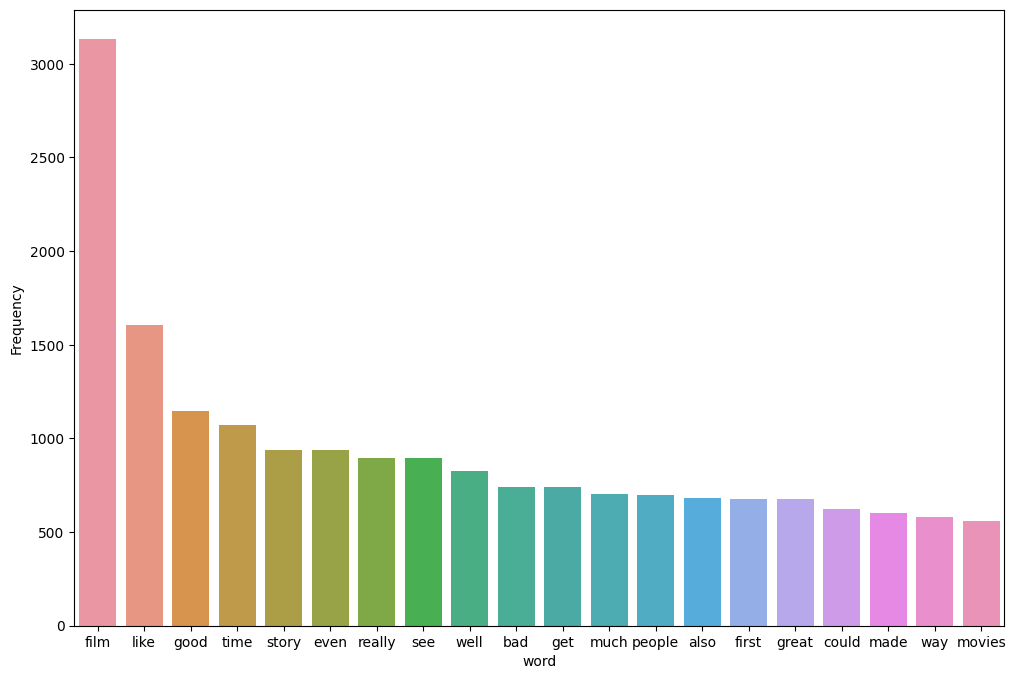

In [32]:
result = pd.DataFrame(word_dist.most_common(200),columns=['word', 'Frequency'])
plt.figure(figsize=(12,8))
sbn.barplot(x='word',y='Frequency',data = result.head(20))